## Dataset

In [13]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [15]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2) 

test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, num_workers=2) 

In [16]:
print("nums of train:", len(train_data))
print("nums of test:", len(test_data))

nums of train: 50000
nums of test: 10000


In [17]:
image, label = train_data[0]
print("Shape of img:", image.shape)  # örn: torch.Size([1, 32, 32])
print("Label:", label)
print("Type:", type(image))

Shape of img: torch.Size([3, 224, 224])
Label: 6
Type: <class 'torch.Tensor'>


In [18]:
image

tensor([[[-1.1075, -1.1075, -1.1075,  ...,  0.4166,  0.4166,  0.4166],
         [-1.1075, -1.1075, -1.1075,  ...,  0.4166,  0.4166,  0.4166],
         [-1.1075, -1.1075, -1.1075,  ...,  0.4166,  0.4166,  0.4166],
         ...,
         [ 0.9132,  0.9132,  0.9132,  ..., -0.0116, -0.0116, -0.0116],
         [ 0.9132,  0.9132,  0.9132,  ..., -0.0116, -0.0116, -0.0116],
         [ 0.9132,  0.9132,  0.9132,  ..., -0.0116, -0.0116, -0.0116]],

        [[-0.9503, -0.9503, -0.9503,  ...,  0.1352,  0.1352,  0.1352],
         [-0.9503, -0.9503, -0.9503,  ...,  0.1352,  0.1352,  0.1352],
         [-0.9503, -0.9503, -0.9503,  ...,  0.1352,  0.1352,  0.1352],
         ...,
         [ 0.4853,  0.4853,  0.4853,  ..., -0.4251, -0.4251, -0.4251],
         [ 0.4853,  0.4853,  0.4853,  ..., -0.4251, -0.4251, -0.4251],
         [ 0.4853,  0.4853,  0.4853,  ..., -0.4251, -0.4251, -0.4251]],

        [[-0.7064, -0.7064, -0.7064,  ..., -0.0092, -0.0092, -0.0092],
         [-0.7064, -0.7064, -0.7064,  ..., -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


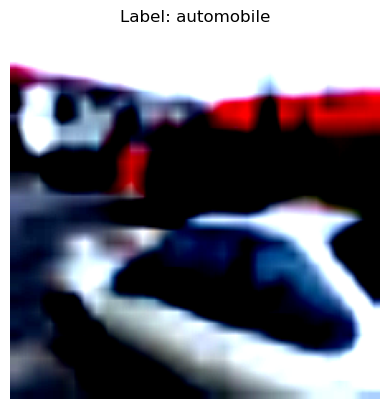

In [39]:
import matplotlib.pyplot as plt

# CIFAR-10 sınıf isimleri
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# 49999. görüntü ve etiketini al
image, label = train_data[49999]

# Görüntüyü HxWxC formatına çevir
image = image.permute(1, 2, 0)

# Görüntüyü göster
plt.imshow(image.numpy())
plt.title(f"Label: {classes[label]}")
plt.axis('off')
plt.show()


## Model 3

In [20]:

import torch.nn as nn
import torchvision.models as models
import torch.optim as optim

model = models.resnet18(pretrained=True)

# ResNet'in son katmanı (Fully Connected layer) 'fc' olarak adlandırılır.
# Bu katmanın giriş özelliğini (in_features) alıp, 10 sınıflık yeni bir katmanla değiştiriyoruz.
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Modeli seçilen cihaza (GPU veya CPU) taşı
model = model.to(device)

# --- Ağırlıkları Dondurma (İsteğe Bağlı - Transfer Learning Senaryosu İçin) ---
# Eğer ImageNet özelliklerini koruyup sadece son katmanı eğitmek istiyorsanız:
# İlk başta tüm parametreleri dondurun
for param in model.parameters():
    param.requires_grad = False

# Sadece yeni eklediğimiz son katmanın (fc) parametrelerini eğitime açın
for param in model.fc.parameters():
    param.requires_grad = True

# Modelin hangi katmanlarının eğitilebilir olduğunu kontrol edelim
print("\nParametrelerin eğitilebilirlik durumu:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: Eğitilebilir")



Parametrelerin eğitilebilirlik durumu:
fc.weight: Eğitilebilir
fc.bias: Eğitilebilir


## Model Train on Train Dataset

In [21]:
for name, param in model.named_parameters():
    print(f"Parametre adı: {name}")
    print(f"Şekli: {param.shape}")
    print(f"Değerler:\n{param}")
    print("-----------")

Parametre adı: conv1.weight
Şekli: torch.Size([64, 3, 7, 7])
Değerler:
Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-0

In [22]:
criterion = nn.CrossEntropyLoss()
# Yalnızca son katmanı eğitmek için 
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

print("\nStarting training (fine-tuning)...")

num_epochs = 5
for epoch in range(num_epochs): 
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)  # Verileri GPU'ya taşı
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if (i+1) % 100 == 0: # Her 100 batch'te bir
             print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


    print(f"Epoch {epoch+1}, Average Loss: {running_loss / len(train_loader):.4f}")

print("Finished Training")
        


Starting training (fine-tuning)...
Epoch [1/5], Step [100/782], Loss: 0.9608
Epoch [1/5], Step [200/782], Loss: 0.6766
Epoch [1/5], Step [300/782], Loss: 0.6742
Epoch [1/5], Step [400/782], Loss: 0.8135
Epoch [1/5], Step [500/782], Loss: 0.6427
Epoch [1/5], Step [600/782], Loss: 0.7115
Epoch [1/5], Step [700/782], Loss: 0.6197
Epoch 1, Average Loss: 0.8256
Epoch [2/5], Step [100/782], Loss: 0.4863
Epoch [2/5], Step [200/782], Loss: 0.6076
Epoch [2/5], Step [300/782], Loss: 0.6428
Epoch [2/5], Step [400/782], Loss: 0.5795
Epoch [2/5], Step [500/782], Loss: 0.4932
Epoch [2/5], Step [600/782], Loss: 0.4987
Epoch [2/5], Step [700/782], Loss: 0.5322
Epoch 2, Average Loss: 0.6169
Epoch [3/5], Step [100/782], Loss: 0.8826
Epoch [3/5], Step [200/782], Loss: 0.6769
Epoch [3/5], Step [300/782], Loss: 0.4820
Epoch [3/5], Step [400/782], Loss: 0.5514
Epoch [3/5], Step [500/782], Loss: 0.5103
Epoch [3/5], Step [600/782], Loss: 0.7065
Epoch [3/5], Step [700/782], Loss: 0.7188
Epoch 3, Average Loss:

## Model Test on Test Dataset

In [23]:
model.eval()

correct = 0
total = 0

with torch.no_grad():  
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 80.46%


In [24]:
correct

8046